<a href="https://colab.research.google.com/github/SoheliPaul/LLM/blob/main/2348561_LLM_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Develop a Python script to load the fine-tuned model and tokenizer.**

In [1]:
import torch
from transformers import BertForQuestionAnswering
from transformers import BertTokenizer

In [ ]:
#Model
model = BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad', return_dict=False)

#Tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/443 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

Some weights of the model checkpoint at bert-large-uncased-whole-word-masking-finetuned-squad were not used when initializing BertForQuestionAnswering: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForQuestionAnswering from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForQuestionAnswering from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
question = '''What is Machine Learning?'''

paragraph = ''' Machine learning (ML) is the scientific study of algorithms and statistical models that computer systems use to progressively improve their performance
                on a specific task. Machine learning algorithms build a mathematical model of sample data, known as "training data", in order to make predictions or
                decisions without being explicitly programmed to perform the task. Machine learning algorithms are used in the applications of email filtering, detection
                of network intruders, and computer vision, where it is infeasible to develop an algorithm of specific instructions for performing the task. Machine learning
                is closely related to computational statistics, which focuses on making predictions using computers. The study of mathematical optimization delivers methods,
                theory and application domains to the field of machine learning. Data mining is a field of study within machine learning, and focuses on exploratory
                data analysis through unsupervised learning.In its application across business problems, machine learning is also referred to as predictive analytics. '''

encoding = tokenizer.encode_plus(text=question,text_pair=paragraph)

inputs = encoding['input_ids']  #Token embeddings
sentence_embedding = encoding['token_type_ids']  #Segment embeddings
tokens = tokenizer.convert_ids_to_tokens(inputs) #input tokens

In [ ]:
start_scores, end_scores = model(input_ids=torch.tensor([inputs]), token_type_ids=torch.tensor([sentence_embedding]))

In [ ]:
start_index = torch.argmax(start_scores)

end_index = torch.argmax(end_scores)

answer = ' '.join(tokens[start_index:end_index+1])

In [ ]:
corrected_answer = ''

for word in answer.split():

    #If it's a subword token
    if word[0:2] == '##':
        corrected_answer += word[2:]
    else:
        corrected_answer += ' ' + word

print(corrected_answer)

 the scientific study of algorithms and statistical models


# **Develop a Python script for handling multimodal inputs.**

**Importing Necessary Libraries**

In [ ]:
from transformers import BlipProcessor, BlipForConditionalGeneration
from PIL import Image
import requests
import torch
import cv2
from google.colab.patches import cv2_imshow

**Function to process text and image inputs**

In [ ]:
def process_text_and_image(image_url: str, text: str):
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
    image = Image.open(requests.get(image_url, stream=True).raw).convert("RGB")
    inputs = processor(images=image, text=text, return_tensors="pt")
    model.eval()
    with torch.no_grad():
        outputs = model.generate(**inputs)
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1249: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


Generated Caption: a description of the image. owl clipart


In [ ]:
def main():
    image_url = "https://codeskulptor-demos.commondatastorage.googleapis.com/descent/person.png"
    text = "A description of the image."

    caption = process_text_and_image(image_url, text)

    print("Generated Caption:", caption)
if __name__ == "__main__":
    main()

Generated Caption: a description of the image. owl clipart


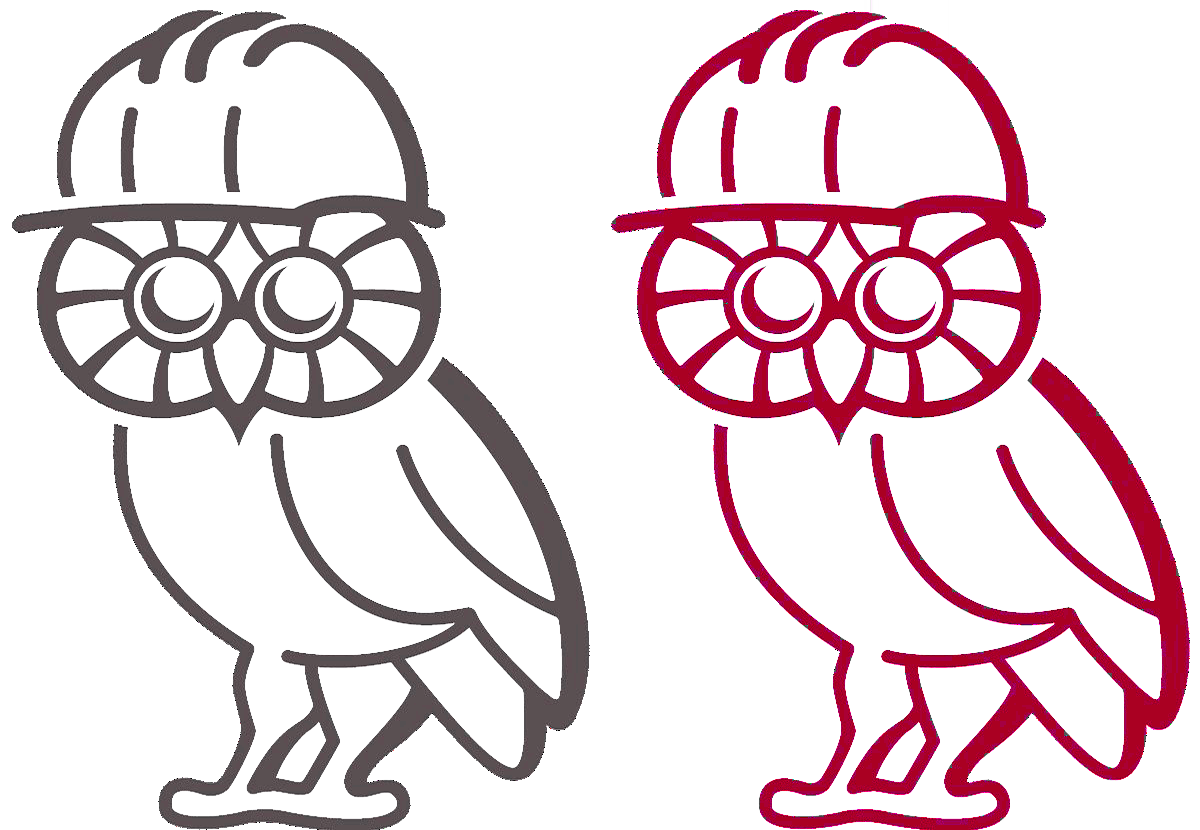

In [ ]:
image = cv2.imread("person.png")
cv2_imshow(image)

In [ ]:
def main():
    image_url = "https://codeskulptor-demos.commondatastorage.googleapis.com/pang/HfReHl5.jpg"
    text = "What is there in the image?"
    caption = process_text_and_image(image_url, text)
    print("Generated Caption:", caption)
if __name__ == "__main__":
    main()

Generated Caption: what is there in the image? - mountain river


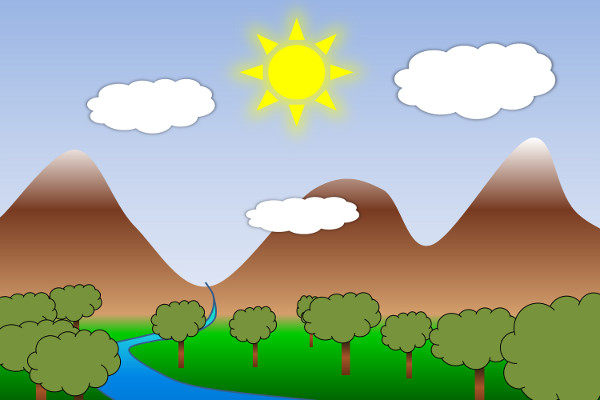

In [ ]:
image = cv2.imread("/content/HfReHl5.jpg")
cv2_imshow(image)

In [ ]:
def process_text_and_image(image_path: str, text: str):
    processor = BlipProcessor.from_pretrained("Salesforce/blip-image-captioning-base")
    model = BlipForConditionalGeneration.from_pretrained("Salesforce/blip-image-captioning-base")
    image = Image.open(image_path).convert("RGB")
    inputs = processor(images=image, text=text, return_tensors="pt")
    model.eval()
    with torch.no_grad():
        outputs = model.generate(**inputs)
    caption = processor.decode(outputs[0], skip_special_tokens=True)
    return caption

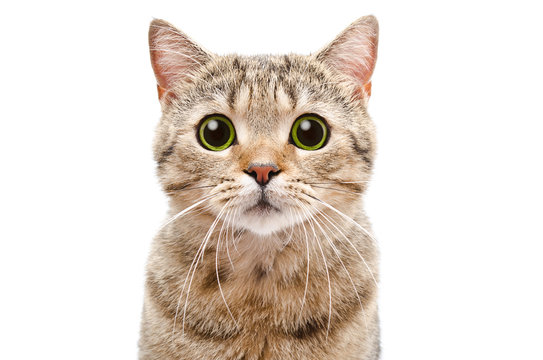

In [ ]:
image = cv2.imread("/content/img7.jpg")
cv2_imshow(image)

In [ ]:
def main():
    image_path = "img7.jpg"
    text = "A description of the image."
    caption = process_text_and_image(image_path, text)
    print("Generated Caption:", caption)
if __name__ == "__main__":
    main()

Generated Caption: a description of the image. cat isolated on white background
